<a href="https://colab.research.google.com/github/PETER-NDIRITU/5TH-MAY-2024-APP-TEST/blob/main/DeKUT_RideShare_Algorithm_STAR_VISION_%26_KSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Next-Gen Satellite - Rideshare SpaceBorneAI Program - STAR.VISION & Kenya Space Agency (KSA).**

# **Development of AI-powered crop health monitoring algorithm using EO data: A Case Study of Tea in Kangema Sub-County**


# **Introduction**



Drawing inspiration from the STAR.VISION, the Next-Gen Satellite SpaceBorneAI Project represents a groundbreaking approach to agricultural monitoring using advanced satellite technology and artificial intelligence.

Leveraging the WJ-1B satellite with its 1m optical camera featuring RGB and Near-Infrared (NIR) bands, the project aims to develop an ONNX-format machine learning model for precise tea farm health classification in Kangema Sub-County. By utilizing Fully Convolutional Neural Networks (FCNNs), a predominant method in image processing, the project will transform multispectral satellite imagery into actionable insights, enabling rapid vegetation index analysis that can transition from hours-long traditional processing to sub-10-minute intelligent assessment.

The innovative approach aligns with the emerging trend of in-orbit AI, where satellite payloads can directly process and analyze data, potentially revolutionizing agricultural monitoring, crop health prediction, and providing a scalable solution for precision farming that bridges advanced machine learning techniques with space-based earth observation technologies.

# **Main** **Objective**:

1.   To develop an AI-powered crop health monitoring algorithm using remote sensing data.


**Specific** **Objectives**:

1.   To develop a Fully Convolutional Neural Network (FCNN) model to classify tea farm health using Normalized Difference Vegetation Index (NDVI) imagery from Muranga, Kenya.

2.   To convert the trained machine learning model to ONNX format, optimizing it for potential future deployment in space-based satellite systems with edge computing capabilities.

3.   To validate the model's predictive accuracy by using historical satellite imagery (2016-2023) for training and testing its crop health simulation capabilities on 2024 RGB imagery.

# **Setting Up**

**Installing & Importing the necessary libraries**

In [2]:
#Installation of the necessary libraries

!pip install geemap #for fetching RS data from GEE
!pip install rasterio #for imagery analysis
!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118 #for deep learning
!pip install geopandas #for geospatial data manipulation
!pip install -U scikit-learn #for deep learning
!pip install numpy #for mathematical evaluation
!pip install tensorflow #for deep learning
!pip install onnx #for model optimization
!pip install matplotlib #for visualization
!pip install torch #for deep learning
!pip install torchvision #for deep learning
!pip install ee #for fetching RS Data
!pip uninstall earthengine-api -y
!pip install earthengine-api
!pip install GDAL
!pip install tensorflow onnx onnx-tf
!pip install tf2onnx
!pip install onnxruntime
!pip onnxconverter_common
!pip install torch torchvision rasterio tqdm scikit-learn seaborn

Looking in indexes: https://download.pytorch.org/whl/cu118
Found existing installation: earthengine-api 1.4.3
Uninstalling earthengine-api-1.4.3:
  Successfully uninstalled earthengine-api-1.4.3
  Using cached earthengine_api-1.4.3-py3-none-any.whl.metadata (1.8 kB)
Using cached earthengine_api-1.4.3-py3-none-any.whl (457 kB)
ERROR: unknown command "onnxconverter_common"


In [3]:
#Importation of necessary libraries
import rasterio, sklearn, tensorflow, onnx, torch, torchvision
import matplotlib.pyplot as plt
import geopandas as gpd
import torch.nn as nn
import tensorflow as tf
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os
from io import StringIO
from osgeo import gdal
from google.colab import drive
import ee
import geemap
ee.Authenticate()
ee.Initialize(project='ee-thukupeter487soknotproject')

# **Extracting RGB Images from GEE**

In [4]:
#adding the basemap & aoi
Map = geemap.Map(basemap='SATELLITE')
aoi = ee.FeatureCollection("projects/ee-thukupeter487soknotproject/assets/TeaFarm")
Map.addLayer(aoi, {'color':'red'}, 'Tea Farms')
Map.centerObject(aoi)

#funstion to filter clouds
def mask_s2_clouds(image):

  qa = image.select('QA60')

  cloud_bit_mask = 1 << 10
  cirrus_bit_mask = 1 << 11

  mask = (
      qa.bitwiseAnd(cloud_bit_mask)
      .eq(0)
      .And(qa.bitwiseAnd(cirrus_bit_mask).eq(0))
  )

  return image.updateMask(mask).divide(1000)

#fetching RGB's
dataset_2016 = ee.ImageCollection('COPERNICUS/S2_HARMONIZED').filterDate('2016-01-01', '2016-12-31').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)).map(mask_s2_clouds).filter(ee.Filter.bounds(aoi)).median().clip(aoi)
dataset_2017 = ee.ImageCollection('COPERNICUS/S2_HARMONIZED').filterDate('2017-01-01', '2017-12-31').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)).map(mask_s2_clouds).filter(ee.Filter.bounds(aoi)).median().clip(aoi)
dataset_2018 = ee.ImageCollection('COPERNICUS/S2_HARMONIZED').filterDate('2018-01-01', '2018-12-31').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)).map(mask_s2_clouds).filter(ee.Filter.bounds(aoi)).median().clip(aoi)
dataset_2019 = ee.ImageCollection('COPERNICUS/S2_HARMONIZED').filterDate('2019-01-01', '2019-12-31').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)).map(mask_s2_clouds).filter(ee.Filter.bounds(aoi)).median().clip(aoi)
dataset_2020 = ee.ImageCollection('COPERNICUS/S2_HARMONIZED').filterDate('2020-01-01', '2020-12-31').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)).map(mask_s2_clouds).filter(ee.Filter.bounds(aoi)).median().clip(aoi)
dataset_2021 = ee.ImageCollection('COPERNICUS/S2_HARMONIZED').filterDate('2021-01-01', '2021-12-31').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)).map(mask_s2_clouds).filter(ee.Filter.bounds(aoi)).median().clip(aoi)
dataset_2022 = ee.ImageCollection('COPERNICUS/S2_HARMONIZED').filterDate('2022-01-01', '2022-12-31').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)).map(mask_s2_clouds).filter(ee.Filter.bounds(aoi)).median().clip(aoi)
dataset_2023 = ee.ImageCollection('COPERNICUS/S2_HARMONIZED').filterDate('2023-01-01', '2023-12-31').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)).map(mask_s2_clouds).filter(ee.Filter.bounds(aoi)).median().clip(aoi)
dataset_2024 = ee.ImageCollection('COPERNICUS/S2_HARMONIZED').filterDate('2024-01-01', '2024-12-31').filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 20)).map(mask_s2_clouds).filter(ee.Filter.bounds(aoi)).median().clip(aoi)

#setting the visualization parameters
vis_params = {'bands': ['B4', 'B3', 'B2'], 'gamma': 0.9500000000000001, 'min': 0.4050000011920929, 'max': 1.1644999980926514}

#adding the RGB Layers to the basemap
Map.addLayer(dataset_2016, vis_params, 'RGB 2016')
Map.addLayer(dataset_2017, vis_params, 'RGB 2017')
Map.addLayer(dataset_2018, vis_params, 'RGB 2018')
Map.addLayer(dataset_2019, vis_params, 'RGB 2019')
Map.addLayer(dataset_2020, vis_params, 'RGB 2020')
Map.addLayer(dataset_2021, vis_params, 'RGB 2021')
Map.addLayer(dataset_2022, vis_params, 'RGB 2022')
Map.addLayer(dataset_2023, vis_params, 'RGB 2023')
Map.addLayer(dataset_2024, vis_params, 'RGB 2024')

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

# **Extracting NDVI from the RGB Images fron GEE**

In [5]:
# Create the map with satellite basemap
Map = geemap.Map(basemap='SATELLITE')
aoi = ee.FeatureCollection("projects/ee-thukupeter487soknotproject/assets/TeaFarm")
Map.addLayer(aoi, {'color':'red'}, 'Tea Farms')
Map.centerObject(aoi)

# Function to compute NDVI
def addNDVI(image):
    ndvi = image.normalizedDifference(['B8', 'B4']).rename('ndvi')
    return image.addBands(ndvi)

# Fetching NDVI imagery for each year
def get_ndvi_for_year(year):
    dataset = (ee.ImageCollection("COPERNICUS/S2_HARMONIZED")
               .filter(ee.Filter.bounds(aoi))
               .filter(ee.Filter.date(f'{year}-01-01', f'{year}-12-31'))
               .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10)))

    withNdvi = dataset.map(addNDVI).median().select('ndvi').clip(aoi)
    return withNdvi

# NDVI visualization
ndviVis = {
    'min': -1,
    'max': 1,
    'palette': [
        '#8B0000',  # Diseased
        '#FF0000',  # Less Diseases
        '#FF4500',  # Stressed
        '#FFA500',  # Less Stressed
        '#FFFF00',  # Less Healthy
        '#90EE90',  # Moderately Healthy
        '#008000',  # Healhty
        '#006400'   # Very healthy
    ]
}

# Years to process
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]

# Adding NDVI layers for each year
for year in years:
    ndvi_layer = get_ndvi_for_year(year)
    Map.addLayer(ndvi_layer, ndviVis, f'NDVI {year}')

# Add a colorbar instead of a legend
Map.add_colorbar(
    ndviVis,
    label='NDVI Values',
    position='bottomright',
    layer_name='NDVI Colorbar'
)

Map

Map(center=[0, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(childr…

# **Exporting the NDVI Images to GEE**

In [6]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

def export_ndvi_to_drive(aoi, years):
    def addNDVI(image):
        ndvi = image.normalizedDifference(['B8','B4']).rename('ndvi')
        return image.addBands(ndvi)

    vis_params = {
        'min': -1,
        'max': 1,
        'palette': ['blue', 'white', 'green']
    }

    for year in years:
        dataset = (ee.ImageCollection('COPERNICUS/S2_HARMONIZED')
                   .filter(ee.Filter.bounds(aoi))
                   .filter(ee.Filter.date(f'{year}-01-01', f'{year}-12-31'))
                   .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 10)))

        ndvi_image = dataset.map(addNDVI).median().select('ndvi').clip(aoi)

        # Display the image with visualization parameters
        Map.addLayer(ndvi_image, vis_params, f'NDVI {year}')

        export_task = ee.batch.Export.image.toDrive(
            image=ndvi_image,
            description=f'NDVI_Export_{year}',
            scale=10,
            region=aoi.geometry(),
            fileFormat='GeoTIFF',
            folder='A_RideShareTest',
            fileNamePrefix=f'ndvi_{year}'
        )

        export_task.start()
        print(f'Export task started for NDVI {year}')

# Define years and AOI
years = [2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]
aoi = ee.FeatureCollection("projects/ee-thukupeter487soknotproject/assets/TeaFarm")

# Running the export function
export_ndvi_to_drive(aoi, years)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Export task started for NDVI 2016
Export task started for NDVI 2017
Export task started for NDVI 2018
Export task started for NDVI 2019
Export task started for NDVI 2020
Export task started for NDVI 2021
Export task started for NDVI 2022
Export task started for NDVI 2023
Export task started for NDVI 2024


# **Viewing our Data (RGB + NDVI ) within our Google Drive Workspace**

In [7]:
import glob

import os
from google.colab import drive

# Mount drive if not already mounted
drive.mount('/content/drive')

# List files in your dataset directory
dataset_path = "/content/drive/MyDrive/RideShare_SpaceBorneAI_Projects Datasets"
print("Files in directory:")
for file in os.listdir(dataset_path):
    print(file)

# Search for any files starting with RGB or ndvi
rgb_files = glob.glob(f"{dataset_path}/RGB_*")
ndvi_files = glob.glob(f"{dataset_path}/ndvi_*")

print("\nRGB files found:")
for f in rgb_files:
    print(f)

print("\nNDVI files found:")
for f in ndvi_files:
    print(f)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Files in directory:
ndvi_2016.tif
ndvi_2017.tif
ndvi_2018.tif
ndvi_2019.tif
ndvi_2021.tif
ndvi_2020.tif
ndvi_2022.tif
ndvi_2023.tif
Reclassified
ndvi_2024 (2).tif
ndvi_2024 (1).tif
.ipynb_checkpoints
RGB_2017.tif
RGB_2016.tif
RGB_2018.tif
RGB_2019.tif
RGB_2020.tif
RGB_2021.tif
RGB_2022.tif
RGB_2023.tif
RGB_2024.tif
ndvi_prediction_model.h5
Predictions
ndvi_2024.tif
predicted_ndvi_2024.tif
ndvi_model.onnx
ndvi_model.keras

RGB files found:
/content/drive/MyDrive/RideShare_SpaceBorneAI_Projects Datasets/RGB_2017.tif
/content/drive/MyDrive/RideShare_SpaceBorneAI_Projects Datasets/RGB_2016.tif
/content/drive/MyDrive/RideShare_SpaceBorneAI_Projects Datasets/RGB_2018.tif
/content/drive/MyDrive/RideShare_SpaceBorneAI_Projects Datasets/RGB_2019.tif
/content/drive/MyDrive/RideShare_SpaceBorneAI_Projects Datasets/RGB_2020.tif
/content/drive/MyDrive/RideShare_SpaceBorne

# **Plotting the Data (RGB + NDVI)**

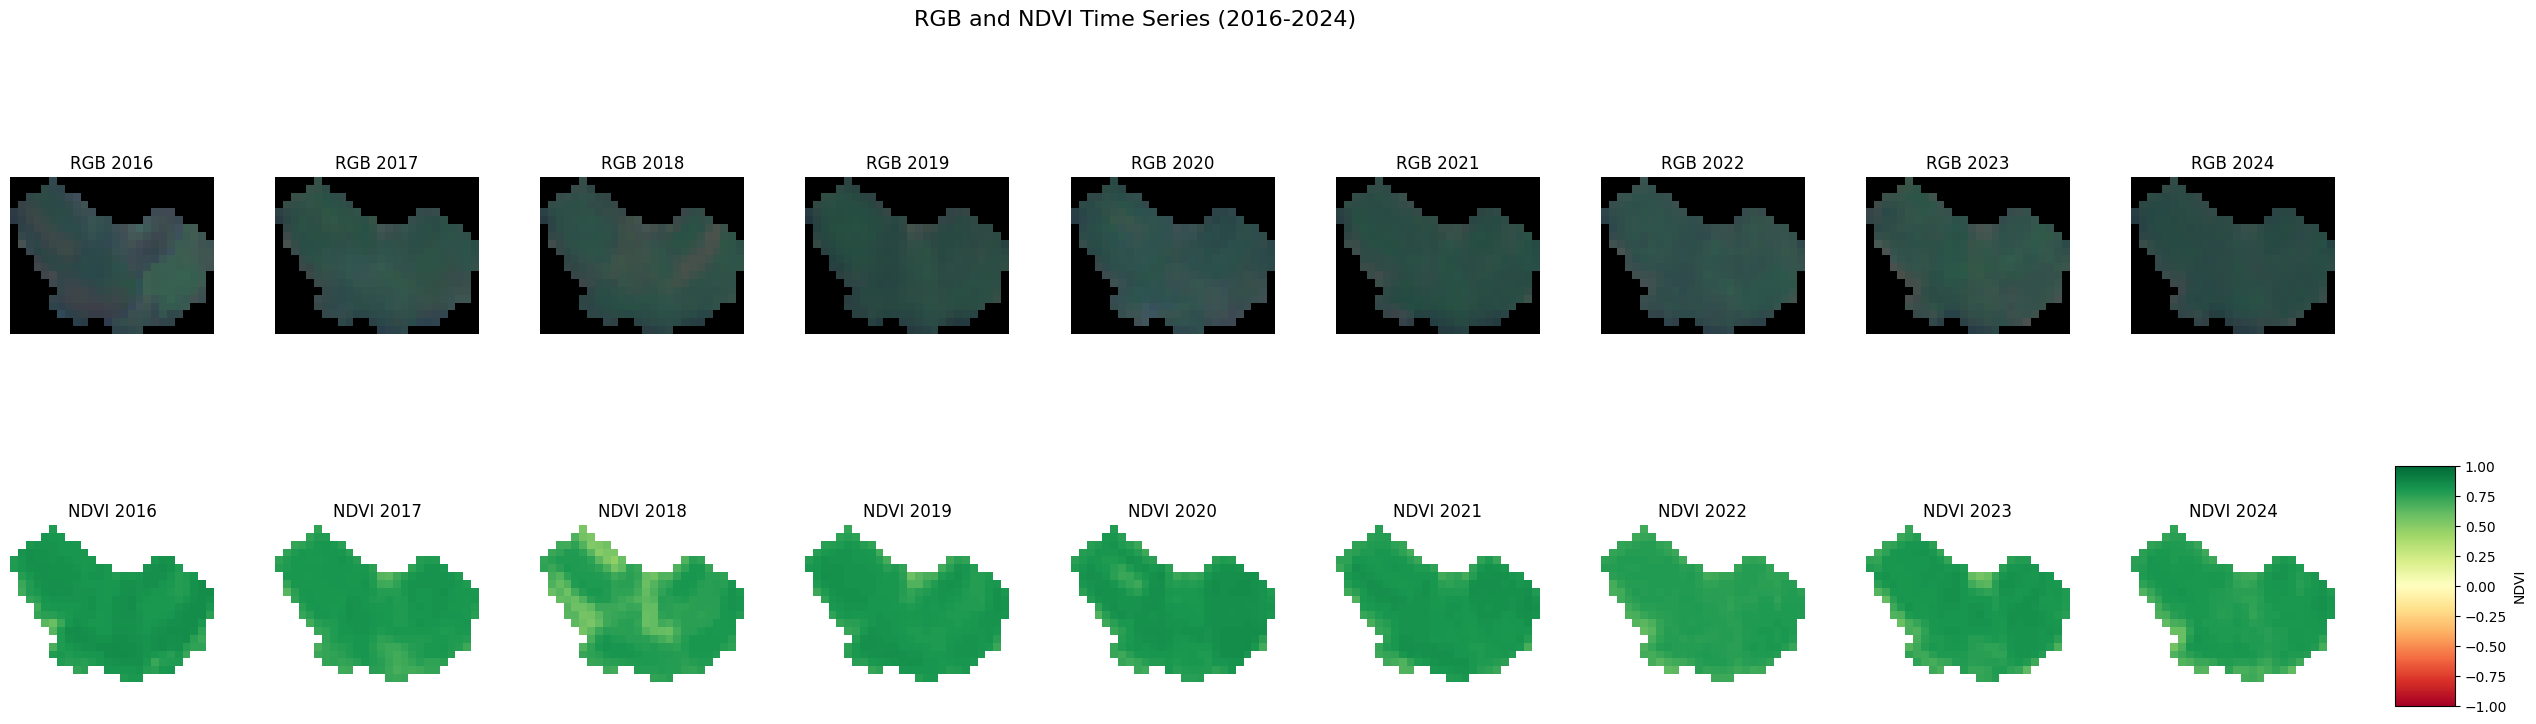


NDVI Statistics by Year:
-----------------------
Year 2016: Mean=nan, Min=nan, Max=nan
Year 2017: Mean=nan, Min=nan, Max=nan
Year 2018: Mean=nan, Min=nan, Max=nan
Year 2019: Mean=nan, Min=nan, Max=nan
Year 2020: Mean=nan, Min=nan, Max=nan
Year 2021: Mean=nan, Min=nan, Max=nan
Year 2022: Mean=nan, Min=nan, Max=nan
Year 2023: Mean=nan, Min=nan, Max=nan
Year 2024: Mean=nan, Min=nan, Max=nan


In [8]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os

# Correct file paths
base_path = '/content/drive/MyDrive/A_RideShareTest'
rgb_files = sorted(glob(os.path.join(base_path, 'rgb_*.tif')))
ndvi_files = sorted(glob(os.path.join(base_path, 'ndvi_*.tif')))

# Create figure with enough subplots for all years
years = range(2016, 2025)
fig, axes = plt.subplots(2, 9, figsize=(30, 8))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Function to normalize RGB values for visualization
def normalize_rgb(array):
    return np.clip(array / 3000, 0, 1)

try:
    # Plot each year
    for idx, year in enumerate(years):
        # Plot RGB
        rgb_file = os.path.join(base_path, f'rgb_{year}.tif')
        if os.path.exists(rgb_file):
            with rasterio.open(rgb_file) as src:
                # Read bands 4,3,2 (RGB)
                rgb = src.read([1,2,3])  # Reading bands in order
                rgb = np.moveaxis(rgb, 0, -1)  # Move channels to last axis
                rgb = normalize_rgb(rgb)

                axes[0, idx].imshow(rgb)
                axes[0, idx].set_title(f'RGB {year}')
                axes[0, idx].axis('off')
        else:
            axes[0, idx].text(0.5, 0.5, f'No RGB data\nfor {year}',
                            ha='center', va='center')
            axes[0, idx].axis('off')

        # Plot NDVI
        ndvi_file = os.path.join(base_path, f'ndvi_{year}.tif')
        if os.path.exists(ndvi_file):
            with rasterio.open(ndvi_file) as src:
                ndvi = src.read(1)  # Read single NDVI band
                im = axes[1, idx].imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
                axes[1, idx].set_title(f'NDVI {year}')
                axes[1, idx].axis('off')
        else:
            axes[1, idx].text(0.5, 0.5, f'No NDVI data\nfor {year}',
                            ha='center', va='center')
            axes[1, idx].axis('off')

    # Add colorbar for NDVI
    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.3])
    fig.colorbar(im, cax=cbar_ax, label='NDVI')

    plt.suptitle('RGB and NDVI Time Series (2016-2024)', y=1.02, fontsize=16)
    plt.show()

    # Print statistics for each year
    print("\nNDVI Statistics by Year:")
    print("-----------------------")
    for year in years:
        ndvi_file = os.path.join(base_path, f'ndvi_{year}.tif')
        if os.path.exists(ndvi_file):
            with rasterio.open(ndvi_file) as src:
                ndvi = src.read(1)
                stats = {
                    'Year': year,
                    'Mean NDVI': np.mean(ndvi),
                    'Min NDVI': np.min(ndvi),
                    'Max NDVI': np.max(ndvi)
                }
                print(f"Year {stats['Year']}: Mean={stats['Mean NDVI']:.3f}, Min={stats['Min NDVI']:.3f}, Max={stats['Max NDVI']:.3f}")

except Exception as e:
    print(f"An error occurred: {str(e)}")
    # Print the files found to help with debugging
    print("\nRGB files found:")
    for f in rgb_files:
        print(f)
    print("\nNDVI files found:")
    for f in ndvi_files:
        print(f)

# **Checking the NDVI Values statistics within our NDVI Images**


NDVI Statistics by Year:
-----------------------

Year 2016:
Mean NDVI = 0.807
Min NDVI = 0.580
Max NDVI = 0.848
Valid pixels: 322
Total pixels: 520
Percent valid: 61.9%


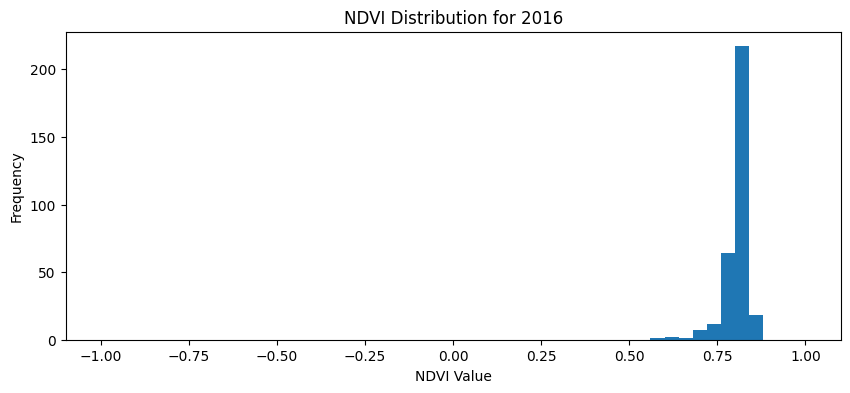


Year 2017:
Mean NDVI = 0.782
Min NDVI = 0.633
Max NDVI = 0.824
Valid pixels: 322
Total pixels: 520
Percent valid: 61.9%


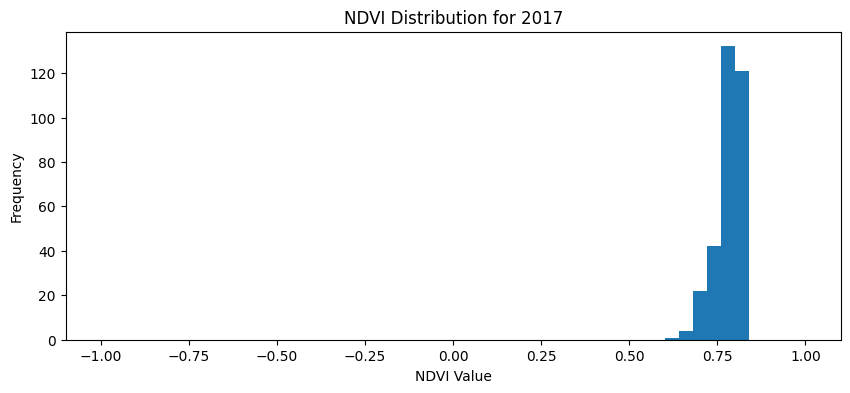


Year 2018:
Mean NDVI = 0.727
Min NDVI = 0.468
Max NDVI = 0.818
Valid pixels: 322
Total pixels: 520
Percent valid: 61.9%


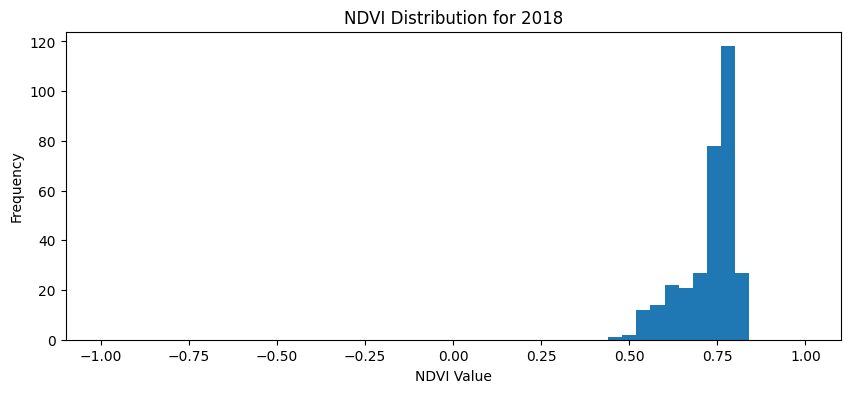


Year 2019:
Mean NDVI = 0.793
Min NDVI = 0.575
Max NDVI = 0.835
Valid pixels: 322
Total pixels: 520
Percent valid: 61.9%


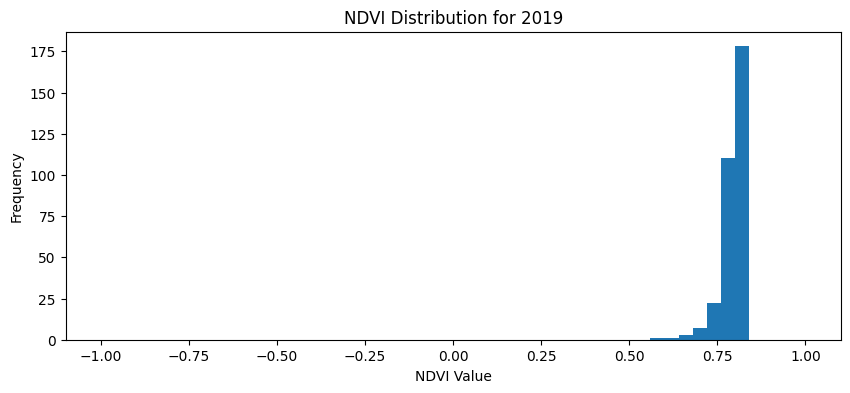


Year 2020:
Mean NDVI = 0.802
Min NDVI = 0.655
Max NDVI = 0.845
Valid pixels: 322
Total pixels: 520
Percent valid: 61.9%


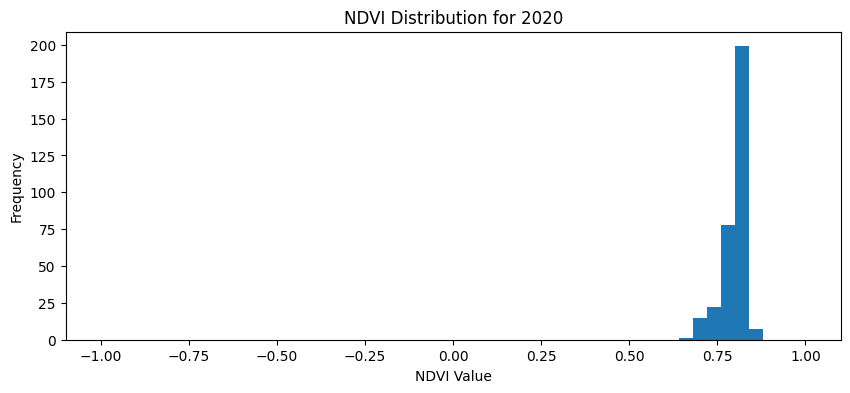


Year 2021:
Mean NDVI = 0.795
Min NDVI = 0.651
Max NDVI = 0.839
Valid pixels: 322
Total pixels: 520
Percent valid: 61.9%


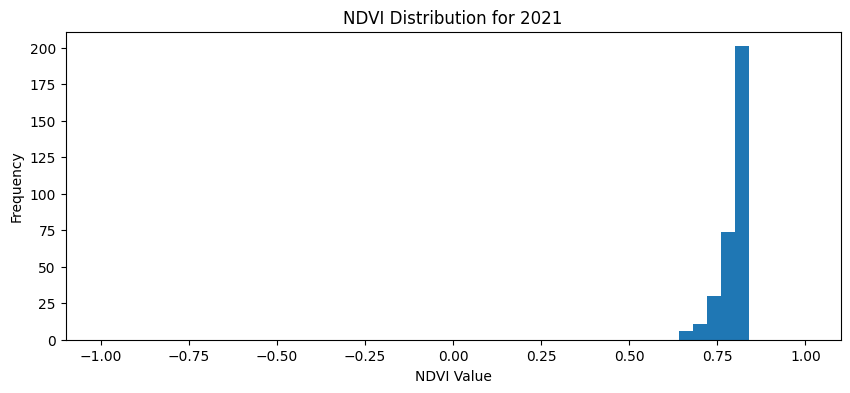


Year 2022:
Mean NDVI = 0.757
Min NDVI = 0.607
Max NDVI = 0.794
Valid pixels: 322
Total pixels: 520
Percent valid: 61.9%


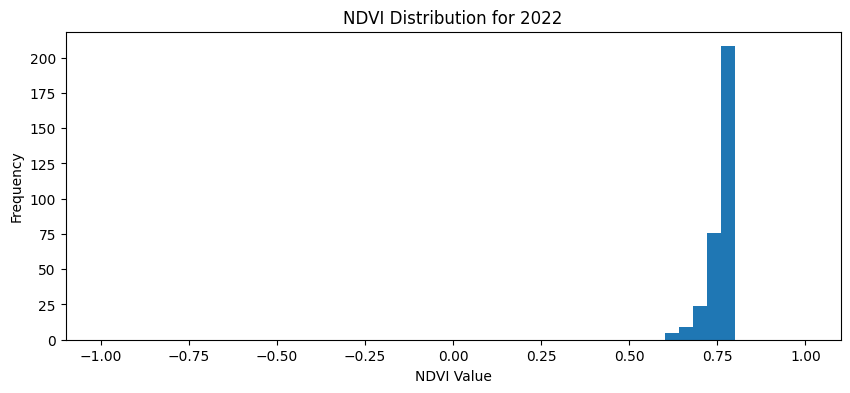


Year 2023:
Mean NDVI = 0.782
Min NDVI = 0.548
Max NDVI = 0.826
Valid pixels: 322
Total pixels: 520
Percent valid: 61.9%


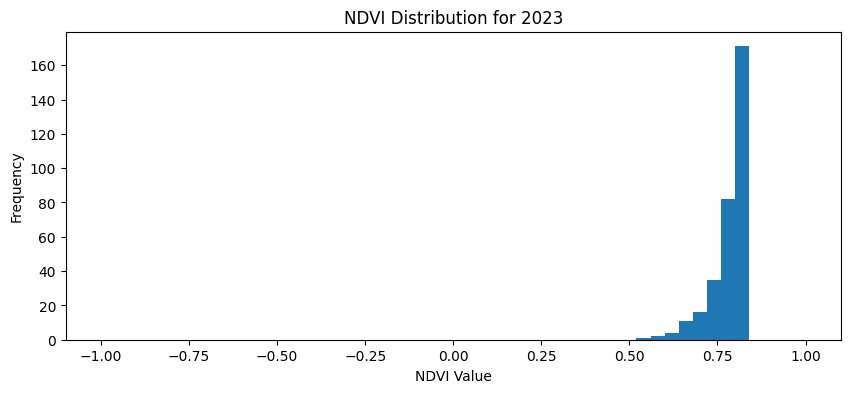


Year 2024:
Mean NDVI = 0.771
Min NDVI = 0.556
Max NDVI = 0.823
Valid pixels: 322
Total pixels: 520
Percent valid: 61.9%


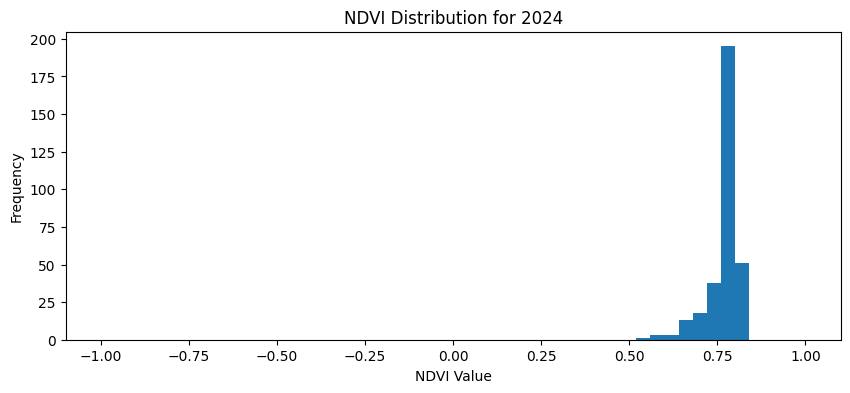


Sample of first few NDVI values from 2016:
[      nan       nan       nan       nan       nan 0.7814022       nan
       nan       nan       nan       nan       nan       nan       nan
       nan       nan       nan       nan       nan       nan]
Data type: float32


In [9]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import os

def calculate_stats(ndvi_array):
    # Remove any potential infinite values
    ndvi_array = np.nan_to_num(ndvi_array, nan=np.nan, posinf=np.nan, neginf=np.nan)

    # Create a mask for valid NDVI values (-1 to 1)
    valid_mask = (ndvi_array >= -1) & (ndvi_array <= 1)

    # Get only valid values
    valid_data = ndvi_array[valid_mask]

    if len(valid_data) > 0:
        return {
            'Mean': np.mean(valid_data),
            'Min': np.min(valid_data),
            'Max': np.max(valid_data),
            'Valid_pixels': len(valid_data),
            'Total_pixels': ndvi_array.size,
            'Percent_valid': (len(valid_data) / ndvi_array.size) * 100
        }
    else:
        return {
            'Mean': np.nan,
            'Min': np.nan,
            'Max': np.nan,
            'Valid_pixels': 0,
            'Total_pixels': ndvi_array.size,
            'Percent_valid': 0
        }

# Process each year
base_path = '/content/drive/MyDrive/A_RideShareTest'
years = range(2016, 2025)

print("\nNDVI Statistics by Year:")
print("-----------------------")
for year in years:
    ndvi_file = os.path.join(base_path, f'ndvi_{year}.tif')
    if os.path.exists(ndvi_file):
        with rasterio.open(ndvi_file) as src:
            # Read the data and get nodata value
            ndvi = src.read(1)
            nodata = src.nodata

            # If nodata value exists, mask it
            if nodata is not None:
                ndvi = np.ma.masked_equal(ndvi, nodata)

            # Calculate statistics
            stats = calculate_stats(ndvi)

            print(f"\nYear {year}:")
            print(f"Mean NDVI = {stats['Mean']:.3f}")
            print(f"Min NDVI = {stats['Min']:.3f}")
            print(f"Max NDVI = {stats['Max']:.3f}")
            print(f"Valid pixels: {stats['Valid_pixels']:,}")
            print(f"Total pixels: {stats['Total_pixels']:,}")
            print(f"Percent valid: {stats['Percent_valid']:.1f}%")

            # Print a quick histogram of values for debugging
            valid_data = ndvi[(ndvi >= -1) & (ndvi <= 1)]
            if len(valid_data) > 0:
                plt.figure(figsize=(10, 4))
                plt.hist(valid_data.flatten(), bins=50, range=(-1, 1))
                plt.title(f'NDVI Distribution for {year}')
                plt.xlabel('NDVI Value')
                plt.ylabel('Frequency')
                plt.show()
    else:
        print(f"\nYear {year}: File not found")

# Let's also check the actual values in the first few pixels of one file
sample_year = 2016
sample_file = os.path.join(base_path, f'ndvi_{sample_year}.tif')
if os.path.exists(sample_file):
    with rasterio.open(sample_file) as src:
        ndvi = src.read(1)
        print(f"\nSample of first few NDVI values from {sample_year}:")
        print(ndvi.flatten()[:20])  # Print first 20 values
        print(f"Data type: {ndvi.dtype}")

# **Building a Fully Connected Neural Network for Regression Task over our NDVI Images - Keras Model**

**Pre-processing our data**

In [2]:
import os
import numpy as np
import rasterio
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Custom accuracy metric for regression
def regression_accuracy(y_true, y_pred):
    tolerance = 0.1  # Define a tolerance range (e.g., ±0.1 NDVI)
    correct_predictions = tf.abs(y_true - y_pred) <= tolerance
    return tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

# Predict and visualize NDVI
def predict_and_visualize(model, rgb_path, output_path):
    with rasterio.open(rgb_path) as src:
        rgb = src.read([1, 2, 3]) / 3000.0
        rgb = np.clip(rgb, 0, 1)
        transform = src.transform
        crs = src.crs

    h, w = rgb.shape[1], rgb.shape[2]
    rgb_reshaped = rgb.reshape(3, -1).T
    ndvi_pred = model.predict(rgb_reshaped, batch_size=1024)
    ndvi_pred = ndvi_pred.reshape(h, w)

    # Save predicted NDVI
    with rasterio.open(output_path, 'w', driver='GTiff', height=h, width=w,
                       count=1, dtype=np.float32, crs=crs, transform=transform) as dst:
        dst.write(ndvi_pred, 1)

    # Visualize NDVI
    plt.figure(figsize=(10, 10))
    plt.imshow(ndvi_pred, cmap='RdYlGn', vmin=-1, vmax=1)
    plt.colorbar(label='NDVI')
    plt.title('Predicted NDVI (2024)')
    plt.show()

**Model Building**

In [3]:
# Model architecture
def create_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='tanh')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae', regression_accuracy])
    return model

# Visualization function
def plot_metrics(history):
    plt.figure(figsize=(15, 5))

    # Loss Curve
    plt.subplot(1, 3, 1)
    plt.plot(history.history['loss'], label='Train Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Mean Absolute Error Curve
    plt.subplot(1, 3, 2)
    plt.plot(history.history['mae'], label='Train MAE', color='green')
    plt.plot(history.history['val_mae'], label='Validation MAE', color='red')
    plt.title('Mean Absolute Error (MAE)')
    plt.xlabel('Epochs')
    plt.ylabel('MAE')
    plt.legend()

    # Accuracy Curve
    plt.subplot(1, 3, 3)
    plt.plot(history.history['regression_accuracy'], label='Train Accuracy', color='purple')
    plt.plot(history.history['val_regression_accuracy'], label='Validation Accuracy', color='brown')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


**Model Training, Prediction & Visualizations**

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 65ms/step - loss: 0.9285 - mae: 0.7876 - regression_accuracy: 0.0997 - val_loss: 0.5006 - val_mae: 0.7061 - val_regression_accuracy: 0.0000e+00
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7647 - mae: 0.6932 - regression_accuracy: 0.1026 - val_loss: 0.4018 - val_mae: 0.6322 - val_regression_accuracy: 0.0000e+00
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.6770 - mae: 0.6465 - regression_accuracy: 0.1108 - val_loss: 0.3331 - val_mae: 0.5753 - val_regression_accuracy: 0.0000e+00
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.5948 - mae: 0.5948 - regression_accuracy: 0.1121 - val_loss: 0.2726 - val_mae: 0.5200 - val_regression_accuracy: 0.0000e+00
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5268 - mae: 0.5512 - regression_accuracy: 0.1206 - val_loss: 0.2220 - val_mae: 0.4689 - val_regression_accuracy: 0.0000e+00
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4863 - mae: 0.5195 - regression_accur

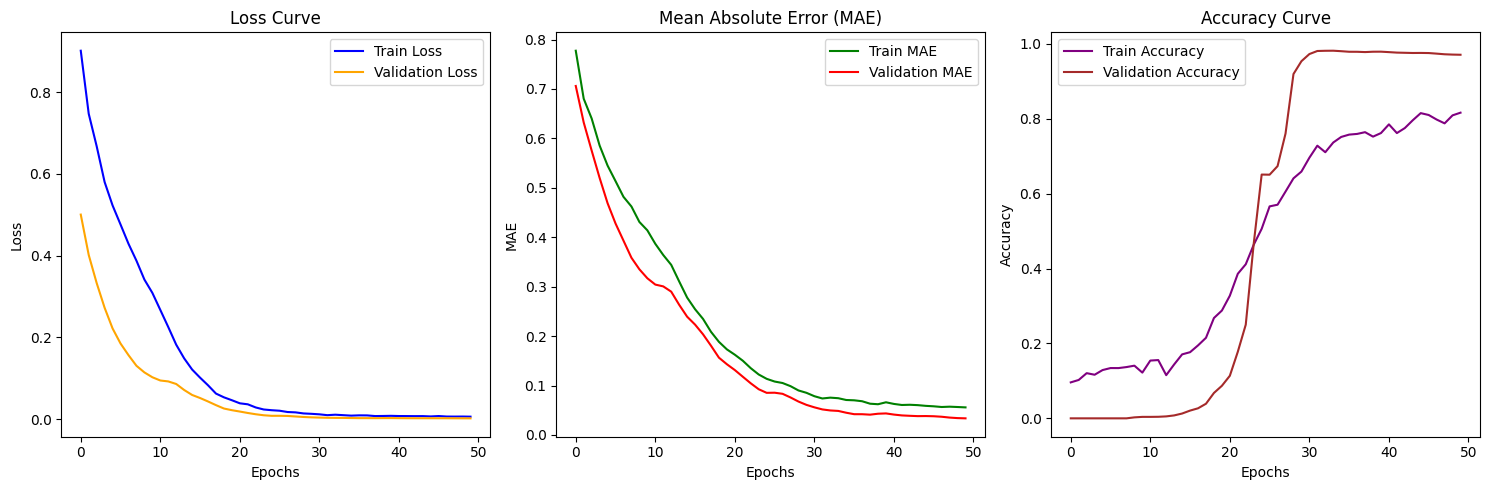

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: -0.0003
MAE: 0.0337
RMSE: 0.0461
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


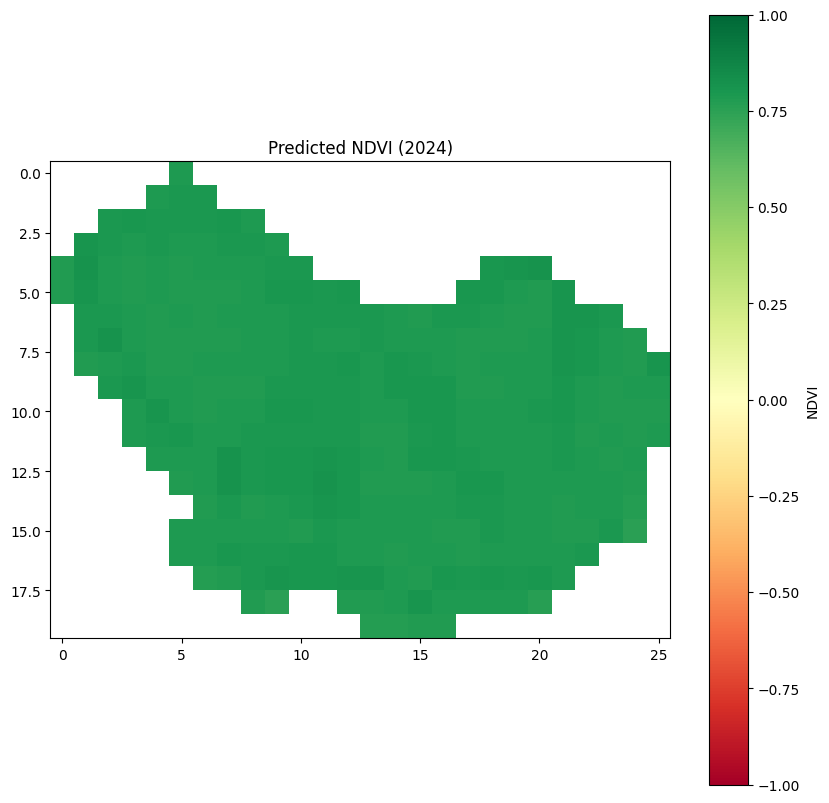

Model saved to: /content/drive/MyDrive/A_RideShareTest/ndvi_predictor.keras
NDVI 2024 Prediction saved to: /content/drive/MyDrive/A_RideShareTest/ndvi_2024_pred.tif


In [4]:
# Main execution
if __name__ == "__main__":
    base_path = '/content/drive/MyDrive/A_RideShareTest'
    model_save_path = '/content/drive/MyDrive/A_RideShareTest/ndvi_predictor.keras'
    prediction_output_path = '/content/drive/MyDrive/A_RideShareTest/ndvi_2024_pred.tif'

    # File paths
    years = range(2016, 2024)
    rgb_files = [os.path.join(base_path, f'rgb_{year}.tif') for year in years]
    ndvi_files = [os.path.join(base_path, f'ndvi_{year}.tif') for year in years]

    # Load data
    rgb_data, ndvi_data = [], []
    for rgb_path, ndvi_path in zip(rgb_files, ndvi_files):
        with rasterio.open(rgb_path) as src:
            rgb = src.read([1, 2, 3]) / 3000.0
            rgb = np.clip(rgb, 0, 1)

        with rasterio.open(ndvi_path) as src:
            ndvi = src.read(1)

        mask = (~np.isnan(ndvi)) & (~np.isnan(rgb).any(axis=0))
        rgb = rgb[:, mask].T
        ndvi = ndvi[mask]

        rgb_data.append(rgb)
        ndvi_data.append(ndvi)

    rgb_data = np.vstack(rgb_data)
    ndvi_data = np.hstack(ndvi_data)

    # Train-test split
    X_train, X_val, y_train, y_val = train_test_split(rgb_data, ndvi_data, test_size=0.2, random_state=42)

    # Create and train model
    model = create_model(X_train.shape[1])
    callbacks = [
        EarlyStopping(patience=10, restore_best_weights=True),
        ModelCheckpoint(model_save_path, save_best_only=True)
    ]

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=50, batch_size=256, callbacks=callbacks, verbose=1
    )

    # Plot training metrics
    plot_metrics(history)

    # Evaluate model
    # Evaluate model
    y_pred = model.predict(X_val)
    print(f"R² Score: {r2_score(y_val, y_pred):.4f}")
    print(f"MAE: {mean_absolute_error(y_val, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred)):.4f}")

    # Predict and visualize NDVI for 2024
    predict_and_visualize(model, os.path.join(base_path, 'rgb_2024.tif'), prediction_output_path)

    print(f"Model saved to: {model_save_path}")
    print(f"NDVI 2024 Prediction saved to: {prediction_output_path}")



# **Keras Model Testing: With other RGB Images (wholly new data)**

In [18]:
import os
import numpy as np
import rasterio
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

# Custom accuracy metric for regression
def regression_accuracy(y_true, y_pred):
    tolerance = 0.1  # Define a tolerance range (e.g., ±0.1 NDVI)
    correct_predictions = tf.abs(y_true - y_pred) <= tolerance
    return tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

# Visualization function
def plot_ndvi(ndvi_image_path, title='Predicted NDVI Image'):
    with rasterio.open(ndvi_image_path) as src:
        ndvi = src.read(1)
        plt.imshow(ndvi, cmap='viridis', vmin=-1, vmax=1)
        plt.colorbar(label='NDVI')
        plt.title(title)
        plt.show()

# Predict NDVI for any RGB image
def predict_and_visualize(model, rgb_image_path, prediction_output_path):
    with rasterio.open(rgb_image_path) as src:
        rgb = src.read([1, 2, 3]) / 3000.0
        rgb = np.clip(rgb, 0, 1)
        mask = ~np.isnan(rgb).any(axis=0)
        rgb = rgb[:, mask].T

    # Predict NDVI
    y_pred = model.predict(rgb)

    # Ensure y_pred is 1D
    y_pred = y_pred.flatten()

    # Create an array for NDVI predictions and assign values directly
    height, width = src.meta['height'], src.meta['width']
    ndvi_predicted = np.zeros((height, width), dtype=np.float32)
    ndvi_predicted[mask.reshape(height, width)] = y_pred

    # Save predicted NDVI image
    with rasterio.open(prediction_output_path, 'w', driver='GTiff',
                       height=height, width=width,
                       count=1, dtype=ndvi_predicted.dtype) as dst:
        dst.write(ndvi_predicted, 1)

    # Plot NDVI
    plot_ndvi(prediction_output_path)

# Load the pre-trained model
model_save_path = '/content/drive/MyDrive/A_RideShareTest/ndvi_predictor.keras'
model = load_model(model_save_path, custom_objects={'regression_accuracy': regression_accuracy})

# Predict and visualize NDVI for Masai Mara 2018
rgb_image_path = '/content/drive/MyDrive/Masai_Mara/Masai_Mara_2024_RGB.tif'
prediction_output_path = '/content/drive/MyDrive/Masai_Mara/Test_2020_NDVI_pred.tif'

predict_and_visualize(model, rgb_image_path, prediction_output_path)


  3387/556005 ━━━━━━━━━━━━━━━━━━━━ 36:04 4ms/step

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.


KeyboardInterrupt



# **Model Saving: To the required .onnx format**

In [19]:
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
import subprocess

# Custom accuracy metric for regression (unchanged)
def regression_accuracy(y_true, y_pred):
    tolerance = 0.1
    correct_predictions = tf.abs(y_true - y_pred) <= tolerance
    return tf.reduce_mean(tf.cast(correct_predictions, tf.float32))

# Model architecture (unchanged)
def create_model(input_dim):
    model = Sequential([
        Dense(64, activation='relu', input_dim=input_dim),
        BatchNormalization(),
        Dropout(0.2),
        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),
        Dense(16, activation='relu'),
        BatchNormalization(),
        Dense(1, activation='tanh')
    ])
    model.compile(optimizer='adam', loss='mse', metrics=['mae', regression_accuracy])
    return model

def save_model_for_conversion(model, save_path):
    """Save the model in SavedModel format"""
    tf.saved_model.save(model, save_path)
    print(f"Model saved in SavedModel format at: {save_path}")

def convert_to_onnx(saved_model_path, onnx_path):
    """Convert SavedModel to ONNX using tf2onnx command line tool"""
    command = f"python -m tf2onnx.convert --saved-model {saved_model_path} --output {onnx_path} --opset 13"
    try:
        subprocess.run(command, shell=True, check=True)
        print(f"Model successfully converted to ONNX and saved at: {onnx_path}")
    except subprocess.CalledProcessError as e:
        print(f"Error converting model: {e}")

if __name__ == "__main__":
    # Paths
    base_path = '/content/drive/MyDrive/A_RideShareTest'
    saved_model_path = os.path.join(base_path, 'saved_model')
    onnx_path = os.path.join(base_path, 'ndvi_predictor.onnx')

    # Load your trained model
    model = tf.keras.models.load_model(
        os.path.join(base_path, 'ndvi_predictor.keras'),
        custom_objects={'regression_accuracy': regression_accuracy}
    )

    # Save in SavedModel format
    save_model_for_conversion(model, saved_model_path)

    # Convert to ONNX
    convert_to_onnx(saved_model_path, onnx_path)

Model saved in SavedModel format at: /content/drive/MyDrive/A_RideShareTest/saved_model
Model successfully converted to ONNX and saved at: /content/drive/MyDrive/A_RideShareTest/ndvi_predictor.onnx


# **ONNX Model Simulation (Inference): With wholly new RGB Images**

In [ ]:
import onnxruntime
import rasterio
import os
import numpy as np
import matplotlib.pyplot as plt

def predict_ndvi_with_onnx(rgb_path, onnx_model_path, output_path=None):

    # Initialize ONNX Runtime session
    session = onnxruntime.InferenceSession(onnx_model_path)
    input_name = session.get_inputs()[0].name

    # Read RGB image
    with rasterio.open(rgb_path) as src:
        rgb = src.read([1, 2, 3])  # Read RGB bands
        profile = src.profile.copy()  # Copy the metadata for saving later

        # Normalize RGB values (as done in training)
        rgb = rgb / 3000.0
        rgb = np.clip(rgb, 0, 1)

        # Reshape for prediction
        original_shape = rgb.shape[1:]  # Save original spatial dimensions
        rgb_reshaped = rgb.reshape(3, -1).T  # Reshape to (pixels, channels)

        # Predict NDVI
        ndvi_flat = session.run(None, {input_name: rgb_reshaped.astype(np.float32)})[0]
        ndvi = ndvi_flat.reshape(original_shape)

        # Visualize results
        plt.figure(figsize=(15, 5))

        # Original RGB
        plt.subplot(131)
        rgb_display = np.moveaxis(rgb, 0, -1)  # Change to channels-last for display
        plt.imshow(rgb_display)
        plt.title('RGB Input')
        plt.axis('off')

        # Predicted NDVI
        plt.subplot(132)
        ndvi_plot = plt.imshow(ndvi, cmap='RdYlGn', vmin=-1, vmax=1)
        plt.colorbar(ndvi_plot)
        plt.title('Predicted NDVI')
        plt.axis('off')

        # NDVI Histogram
        plt.subplot(133)
        plt.hist(ndvi.flatten(), bins=50, range=(-1, 1))
        plt.title('NDVI Distribution')
        plt.xlabel('NDVI Value')
        plt.ylabel('Frequency')

        plt.tight_layout()
        plt.show()

        # Save NDVI prediction if output path is provided
        if output_path:
            profile.update(count=1, dtype=np.float32)
            with rasterio.open(output_path, 'w', **profile) as dst:
                dst.write(ndvi.astype(np.float32), 1)
            print(f"NDVI prediction saved to: {output_path}")

        return ndvi

# Execute prediction
if __name__ == "__main__":
    base_path = '/content/drive/MyDrive/A_RideShareTest'
    rgb_path = os.path.join(base_path, 'Masai_Mara_2022_RGB.tif')
    onnx_path = os.path.join(base_path, 'ndvi_predictor.onnx')
    output_path = os.path.join(base_path, 'mara_ndvi_2016_predicted.tif')

    # Predict and visualize
    predicted_ndvi = predict_ndvi_with_onnx(
        rgb_path=rgb_path,
        onnx_model_path=onnx_path,
        output_path=output_path
    )

    print("NDVI prediction and visualization completed!")